Explicación del Código:
Cálculo de distancias:
Usamos las coordenadas geográficas (latitude, longitude) para calcular distancias entre pares de atracciones.
Proxy para flujo:
Usamos el mínimo de las reseñas como indicador del flujo de visitantes entre atracciones cercanas.
Hipótesis 1:
Analizamos la correlación entre la distancia y el flujo de visitantes.
Se genera un gráfico de dispersión para visualizar la relación.
Construcción de la red:
Usamos un umbral de 50 , 25, 10, 5  y km para conectar nodos (atracciones).
Hipótesis 2:
Calculamos la centralidad de las atracciones y su correlación con las valoraciones y las reseñas.
Se generan gráficos de dispersión para analizar estas relaciones.
Resultados:
Las métricas de correlación y los p-valores se imprimen y grafican.

## Codigo 50 KM

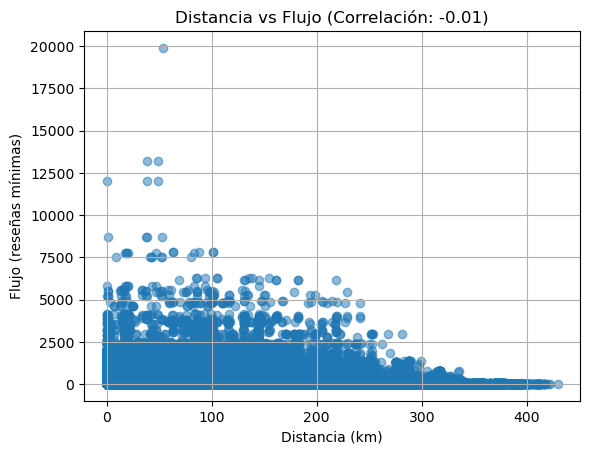

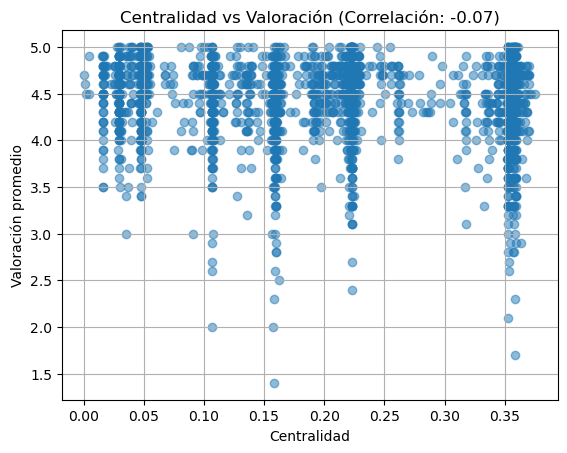

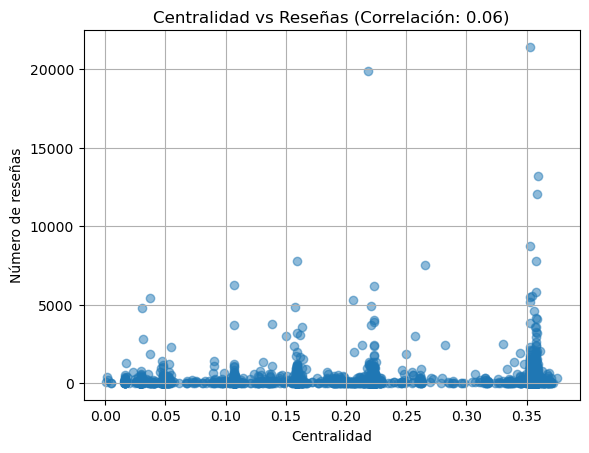

                           Correlación       P-valor
Distancia vs Flujo           -0.009078  2.709252e-64
Centralidad vs Valoración    -0.073301  1.644753e-04
Centralidad vs Reseñas        0.061254  1.646369e-03


In [18]:
import pandas as pd
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cargar la base de datos
file_path = "C:/Users/ariel/OneDrive/Escritorio/Capstone/Base de datos Chiloe Full.xlsx"  # Cambiar por la ruta correcta
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')  # Cambiar el nombre de la hoja si es necesario

# Filtrar columnas relevantes
attractions = df[['placeId', 'latitude', 'longitude', 'rating', 'reviews', 'place name']].drop_duplicates()

# Calcular distancias entre atracciones
distances = []
for i, attraction1 in attractions.iterrows():
    for j, attraction2 in attractions.iterrows():
        if i < j:  # Evitar duplicados
            dist = geodesic(
                (attraction1['latitude'], attraction1['longitude']),
                (attraction2['latitude'], attraction2['longitude'])
            ).kilometers
            distances.append({
                'placeId_1': attraction1['placeId'],
                'placeId_2': attraction2['placeId'],
                'distance_km': dist
            })
distance_df = pd.DataFrame(distances)

# Crear un proxy para flujo de visitantes usando las reseñas mínimas entre atracciones
distance_reviews_df = distance_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_1', right_on='placeId'
).rename(columns={'reviews': 'reviews_1'}).drop(columns=['placeId'])

distance_reviews_df = distance_reviews_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_2', right_on='placeId'
).rename(columns={'reviews': 'reviews_2'}).drop(columns=['placeId'])

# Usar el mínimo de las reseñas entre las dos atracciones como proxy para el flujo
distance_reviews_df['flow'] = distance_reviews_df[['reviews_1', 'reviews_2']].min(axis=1)

# Hipótesis 1: Correlación entre distancia y flujo
corr_distance_flow, p_value_distance_flow = stats.spearmanr(
    distance_reviews_df['distance_km'], distance_reviews_df['flow']
)
plt.scatter(distance_reviews_df['distance_km'], distance_reviews_df['flow'], alpha=0.5)
plt.title(f"Distancia vs Flujo (Correlación: {corr_distance_flow:.2f})")
plt.xlabel("Distancia (km)")
plt.ylabel("Flujo (reseñas mínimas)")
plt.grid(True)
plt.show()

# Construir red para análisis de hubs
graph = nx.Graph()
for _, row in attractions.iterrows():
    graph.add_node(row['placeId'], rating=row['rating'], reviews=row['reviews'], name=row['place name'])

for _, row in distance_df.iterrows():
    if row['distance_km'] < 50:  # Threshold de 50 km
        graph.add_edge(row['placeId_1'], row['placeId_2'], weight=1 / (1 + row['distance_km']))

# Calcular centralidad
centrality = nx.degree_centrality(graph)
hub_data = pd.DataFrame.from_dict(centrality, orient='index', columns=['centrality']).reset_index()
hub_data = hub_data.merge(attractions[['placeId', 'rating', 'reviews', 'place name']],
                          left_on='index', right_on='placeId')

# Hipótesis 2: Correlaciones entre centralidad y valoraciones/reseñas
corr_centrality_rating, p_value_centrality_rating = stats.spearmanr(
    hub_data['centrality'], hub_data['rating']
)
corr_centrality_reviews, p_value_centrality_reviews = stats.spearmanr(
    hub_data['centrality'], hub_data['reviews']
)

# Graficar centralidad vs valoraciones y reseñas
plt.scatter(hub_data['centrality'], hub_data['rating'], alpha=0.5)
plt.title(f"Centralidad vs Valoración (Correlación: {corr_centrality_rating:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Valoración promedio")
plt.grid(True)
plt.show()

plt.scatter(hub_data['centrality'], hub_data['reviews'], alpha=0.5)
plt.title(f"Centralidad vs Reseñas (Correlación: {corr_centrality_reviews:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Número de reseñas")
plt.grid(True)
plt.show()

# Resultados de correlaciones
results = {
    "Distancia vs Flujo": (corr_distance_flow, p_value_distance_flow),
    "Centralidad vs Valoración": (corr_centrality_rating, p_value_centrality_rating),
    "Centralidad vs Reseñas": (corr_centrality_reviews, p_value_centrality_reviews)
}
results_df = pd.DataFrame(results, index=['Correlación', 'P-valor']).T
print(results_df)


# 25 KM #

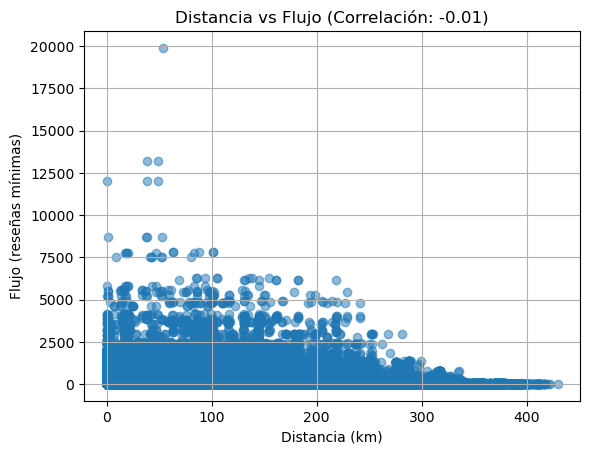

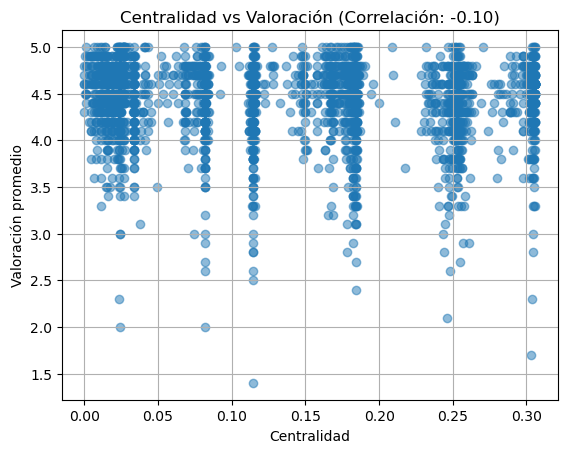

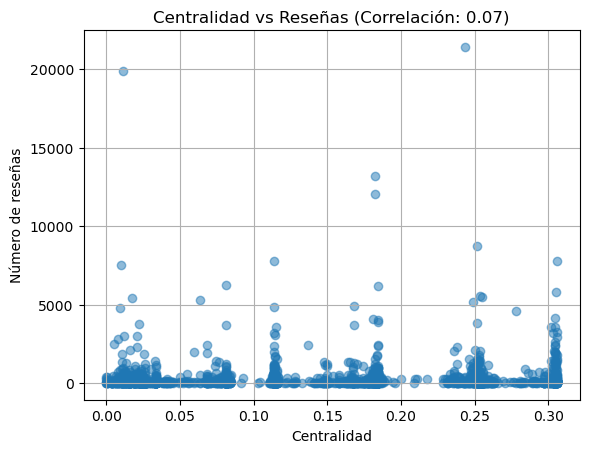

                           Correlación       P-valor
Distancia vs Flujo           -0.009078  2.709252e-64
Centralidad vs Valoración    -0.100668  2.204853e-07
Centralidad vs Reseñas        0.074598  1.255704e-04


In [19]:
import pandas as pd
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cargar la base de datos
file_path = "C:/Users/ariel/OneDrive/Escritorio/Capstone/Base de datos Chiloe Full.xlsx"  # Cambiar por la ruta correcta
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')  # Cambiar el nombre de la hoja si es necesario

# Filtrar columnas relevantes
attractions = df[['placeId', 'latitude', 'longitude', 'rating', 'reviews', 'place name']].drop_duplicates()

# Calcular distancias entre atracciones
distances = []
for i, attraction1 in attractions.iterrows():
    for j, attraction2 in attractions.iterrows():
        if i < j:  # Evitar duplicados
            dist = geodesic(
                (attraction1['latitude'], attraction1['longitude']),
                (attraction2['latitude'], attraction2['longitude'])
            ).kilometers
            distances.append({
                'placeId_1': attraction1['placeId'],
                'placeId_2': attraction2['placeId'],
                'distance_km': dist
            })
distance_df = pd.DataFrame(distances)

# Crear un proxy para flujo de visitantes usando las reseñas mínimas entre atracciones
distance_reviews_df = distance_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_1', right_on='placeId'
).rename(columns={'reviews': 'reviews_1'}).drop(columns=['placeId'])

distance_reviews_df = distance_reviews_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_2', right_on='placeId'
).rename(columns={'reviews': 'reviews_2'}).drop(columns=['placeId'])

# Usar el mínimo de las reseñas entre las dos atracciones como proxy para el flujo
distance_reviews_df['flow'] = distance_reviews_df[['reviews_1', 'reviews_2']].min(axis=1)

# Hipótesis 1: Correlación entre distancia y flujo
corr_distance_flow, p_value_distance_flow = stats.spearmanr(
    distance_reviews_df['distance_km'], distance_reviews_df['flow']
)
plt.scatter(distance_reviews_df['distance_km'], distance_reviews_df['flow'], alpha=0.5)
plt.title(f"Distancia vs Flujo (Correlación: {corr_distance_flow:.2f})")
plt.xlabel("Distancia (km)")
plt.ylabel("Flujo (reseñas mínimas)")
plt.grid(True)
plt.show()

# Construir red para análisis de hubs
graph = nx.Graph()
for _, row in attractions.iterrows():
    graph.add_node(row['placeId'], rating=row['rating'], reviews=row['reviews'], name=row['place name'])

for _, row in distance_df.iterrows():
    if row['distance_km'] < 25:  # Threshold de 50 km
        graph.add_edge(row['placeId_1'], row['placeId_2'], weight=1 / (1 + row['distance_km']))

# Calcular centralidad
centrality = nx.degree_centrality(graph)
hub_data = pd.DataFrame.from_dict(centrality, orient='index', columns=['centrality']).reset_index()
hub_data = hub_data.merge(attractions[['placeId', 'rating', 'reviews', 'place name']],
                          left_on='index', right_on='placeId')

# Hipótesis 2: Correlaciones entre centralidad y valoraciones/reseñas
corr_centrality_rating, p_value_centrality_rating = stats.spearmanr(
    hub_data['centrality'], hub_data['rating']
)
corr_centrality_reviews, p_value_centrality_reviews = stats.spearmanr(
    hub_data['centrality'], hub_data['reviews']
)

# Graficar centralidad vs valoraciones y reseñas
plt.scatter(hub_data['centrality'], hub_data['rating'], alpha=0.5)
plt.title(f"Centralidad vs Valoración (Correlación: {corr_centrality_rating:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Valoración promedio")
plt.grid(True)
plt.show()

plt.scatter(hub_data['centrality'], hub_data['reviews'], alpha=0.5)
plt.title(f"Centralidad vs Reseñas (Correlación: {corr_centrality_reviews:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Número de reseñas")
plt.grid(True)
plt.show()

# Resultados de correlaciones
results = {
    "Distancia vs Flujo": (corr_distance_flow, p_value_distance_flow),
    "Centralidad vs Valoración": (corr_centrality_rating, p_value_centrality_rating),
    "Centralidad vs Reseñas": (corr_centrality_reviews, p_value_centrality_reviews)
}
results_df = pd.DataFrame(results, index=['Correlación', 'P-valor']).T
print(results_df)


# 10 KM #

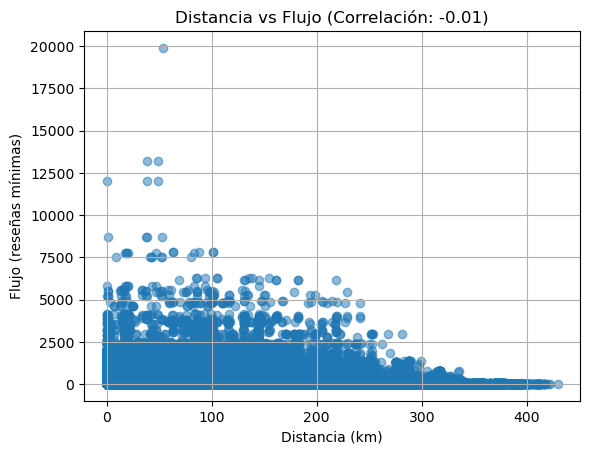

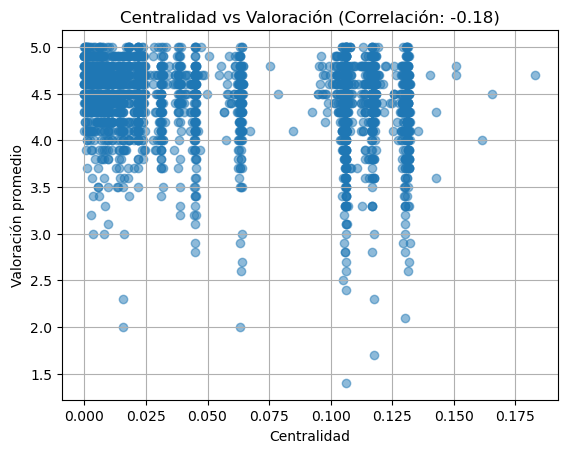

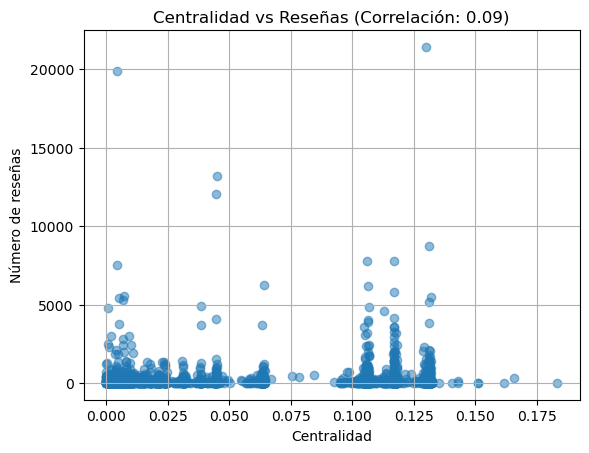

                           Correlación       P-valor
Distancia vs Flujo           -0.009078  2.709252e-64
Centralidad vs Valoración    -0.182650  3.188088e-21
Centralidad vs Reseñas        0.090881  2.935768e-06


In [20]:
import pandas as pd
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cargar la base de datos
file_path = "C:/Users/ariel/OneDrive/Escritorio/Capstone/Base de datos Chiloe Full.xlsx"  # Cambiar por la ruta correcta
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')  # Cambiar el nombre de la hoja si es necesario

# Filtrar columnas relevantes
attractions = df[['placeId', 'latitude', 'longitude', 'rating', 'reviews', 'place name']].drop_duplicates()

# Calcular distancias entre atracciones
distances = []
for i, attraction1 in attractions.iterrows():
    for j, attraction2 in attractions.iterrows():
        if i < j:  # Evitar duplicados
            dist = geodesic(
                (attraction1['latitude'], attraction1['longitude']),
                (attraction2['latitude'], attraction2['longitude'])
            ).kilometers
            distances.append({
                'placeId_1': attraction1['placeId'],
                'placeId_2': attraction2['placeId'],
                'distance_km': dist
            })
distance_df = pd.DataFrame(distances)

# Crear un proxy para flujo de visitantes usando las reseñas mínimas entre atracciones
distance_reviews_df = distance_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_1', right_on='placeId'
).rename(columns={'reviews': 'reviews_1'}).drop(columns=['placeId'])

distance_reviews_df = distance_reviews_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_2', right_on='placeId'
).rename(columns={'reviews': 'reviews_2'}).drop(columns=['placeId'])

# Usar el mínimo de las reseñas entre las dos atracciones como proxy para el flujo
distance_reviews_df['flow'] = distance_reviews_df[['reviews_1', 'reviews_2']].min(axis=1)

# Hipótesis 1: Correlación entre distancia y flujo
corr_distance_flow, p_value_distance_flow = stats.spearmanr(
    distance_reviews_df['distance_km'], distance_reviews_df['flow']
)
plt.scatter(distance_reviews_df['distance_km'], distance_reviews_df['flow'], alpha=0.5)
plt.title(f"Distancia vs Flujo (Correlación: {corr_distance_flow:.2f})")
plt.xlabel("Distancia (km)")
plt.ylabel("Flujo (reseñas mínimas)")
plt.grid(True)
plt.show()

# Construir red para análisis de hubs
graph = nx.Graph()
for _, row in attractions.iterrows():
    graph.add_node(row['placeId'], rating=row['rating'], reviews=row['reviews'], name=row['place name'])

for _, row in distance_df.iterrows():
    if row['distance_km'] < 10:  # Threshold de 10 km
        graph.add_edge(row['placeId_1'], row['placeId_2'], weight=1 / (1 + row['distance_km']))

# Calcular centralidad
centrality = nx.degree_centrality(graph)
hub_data = pd.DataFrame.from_dict(centrality, orient='index', columns=['centrality']).reset_index()
hub_data = hub_data.merge(attractions[['placeId', 'rating', 'reviews', 'place name']],
                          left_on='index', right_on='placeId')

# Hipótesis 2: Correlaciones entre centralidad y valoraciones/reseñas
corr_centrality_rating, p_value_centrality_rating = stats.spearmanr(
    hub_data['centrality'], hub_data['rating']
)
corr_centrality_reviews, p_value_centrality_reviews = stats.spearmanr(
    hub_data['centrality'], hub_data['reviews']
)

# Graficar centralidad vs valoraciones y reseñas
plt.scatter(hub_data['centrality'], hub_data['rating'], alpha=0.5)
plt.title(f"Centralidad vs Valoración (Correlación: {corr_centrality_rating:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Valoración promedio")
plt.grid(True)
plt.show()

plt.scatter(hub_data['centrality'], hub_data['reviews'], alpha=0.5)
plt.title(f"Centralidad vs Reseñas (Correlación: {corr_centrality_reviews:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Número de reseñas")
plt.grid(True)
plt.show()

# Resultados de correlaciones
results = {
    "Distancia vs Flujo": (corr_distance_flow, p_value_distance_flow),
    "Centralidad vs Valoración": (corr_centrality_rating, p_value_centrality_rating),
    "Centralidad vs Reseñas": (corr_centrality_reviews, p_value_centrality_reviews)
}
results_df = pd.DataFrame(results, index=['Correlación', 'P-valor']).T
print(results_df)


# 5 KM #

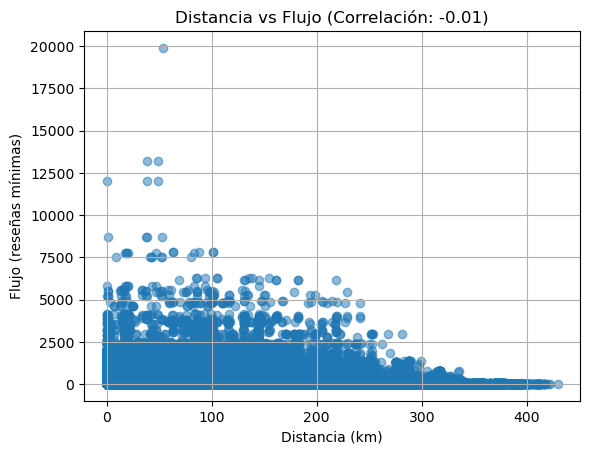

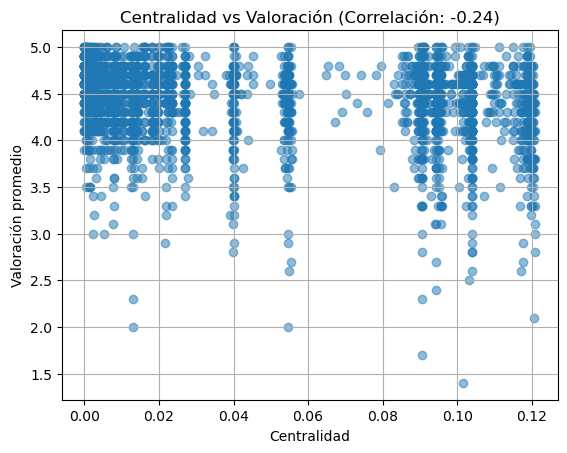

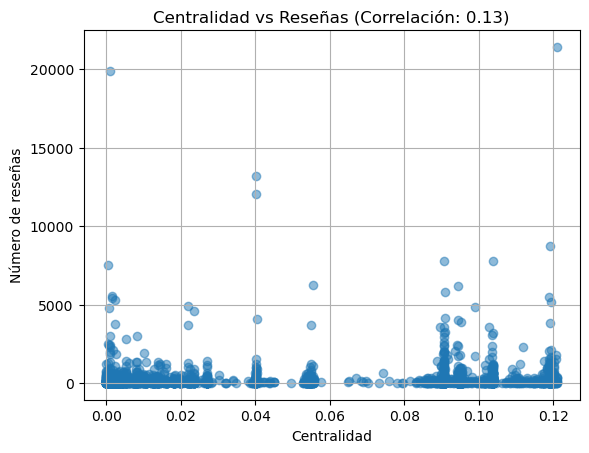

                           Correlación       P-valor
Distancia vs Flujo           -0.009078  2.709252e-64
Centralidad vs Valoración    -0.235030  1.958067e-34
Centralidad vs Reseñas        0.127028  5.839905e-11


In [21]:
import pandas as pd
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cargar la base de datos
file_path = "C:/Users/ariel/OneDrive/Escritorio/Capstone/Base de datos Chiloe Full.xlsx"  # Cambiar por la ruta correcta
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')  # Cambiar el nombre de la hoja si es necesario

# Filtrar columnas relevantes
attractions = df[['placeId', 'latitude', 'longitude', 'rating', 'reviews', 'place name']].drop_duplicates()

# Calcular distancias entre atracciones
distances = []
for i, attraction1 in attractions.iterrows():
    for j, attraction2 in attractions.iterrows():
        if i < j:  # Evitar duplicados
            dist = geodesic(
                (attraction1['latitude'], attraction1['longitude']),
                (attraction2['latitude'], attraction2['longitude'])
            ).kilometers
            distances.append({
                'placeId_1': attraction1['placeId'],
                'placeId_2': attraction2['placeId'],
                'distance_km': dist
            })
distance_df = pd.DataFrame(distances)

# Crear un proxy para flujo de visitantes usando las reseñas mínimas entre atracciones
distance_reviews_df = distance_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_1', right_on='placeId'
).rename(columns={'reviews': 'reviews_1'}).drop(columns=['placeId'])

distance_reviews_df = distance_reviews_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_2', right_on='placeId'
).rename(columns={'reviews': 'reviews_2'}).drop(columns=['placeId'])

# Usar el mínimo de las reseñas entre las dos atracciones como proxy para el flujo
distance_reviews_df['flow'] = distance_reviews_df[['reviews_1', 'reviews_2']].min(axis=1)

# Hipótesis 1: Correlación entre distancia y flujo
corr_distance_flow, p_value_distance_flow = stats.spearmanr(
    distance_reviews_df['distance_km'], distance_reviews_df['flow']
)
plt.scatter(distance_reviews_df['distance_km'], distance_reviews_df['flow'], alpha=0.5)
plt.title(f"Distancia vs Flujo (Correlación: {corr_distance_flow:.2f})")
plt.xlabel("Distancia (km)")
plt.ylabel("Flujo (reseñas mínimas)")
plt.grid(True)
plt.show()

# Construir red para análisis de hubs
graph = nx.Graph()
for _, row in attractions.iterrows():
    graph.add_node(row['placeId'], rating=row['rating'], reviews=row['reviews'], name=row['place name'])

for _, row in distance_df.iterrows():
    if row['distance_km'] < 5:  # Threshold de 5 km
        graph.add_edge(row['placeId_1'], row['placeId_2'], weight=1 / (1 + row['distance_km']))

# Calcular centralidad
centrality = nx.degree_centrality(graph)
hub_data = pd.DataFrame.from_dict(centrality, orient='index', columns=['centrality']).reset_index()
hub_data = hub_data.merge(attractions[['placeId', 'rating', 'reviews', 'place name']],
                          left_on='index', right_on='placeId')

# Hipótesis 2: Correlaciones entre centralidad y valoraciones/reseñas
corr_centrality_rating, p_value_centrality_rating = stats.spearmanr(
    hub_data['centrality'], hub_data['rating']
)
corr_centrality_reviews, p_value_centrality_reviews = stats.spearmanr(
    hub_data['centrality'], hub_data['reviews']
)

# Graficar centralidad vs valoraciones y reseñas
plt.scatter(hub_data['centrality'], hub_data['rating'], alpha=0.5)
plt.title(f"Centralidad vs Valoración (Correlación: {corr_centrality_rating:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Valoración promedio")
plt.grid(True)
plt.show()

plt.scatter(hub_data['centrality'], hub_data['reviews'], alpha=0.5)
plt.title(f"Centralidad vs Reseñas (Correlación: {corr_centrality_reviews:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Número de reseñas")
plt.grid(True)
plt.show()

# Resultados de correlaciones
results = {
    "Distancia vs Flujo": (corr_distance_flow, p_value_distance_flow),
    "Centralidad vs Valoración": (corr_centrality_rating, p_value_centrality_rating),
    "Centralidad vs Reseñas": (corr_centrality_reviews, p_value_centrality_reviews)
}
results_df = pd.DataFrame(results, index=['Correlación', 'P-valor']).T
print(results_df)


# 1 KM #

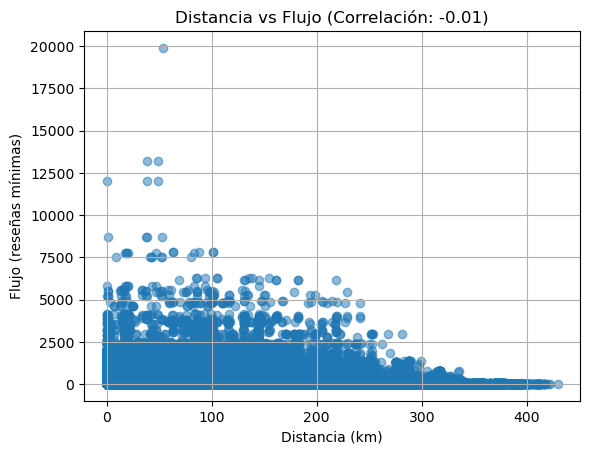

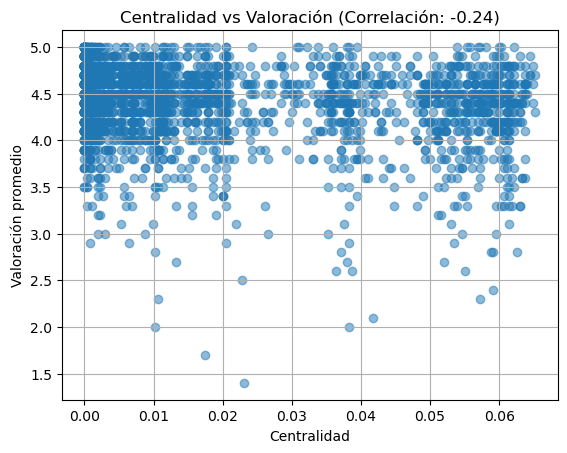

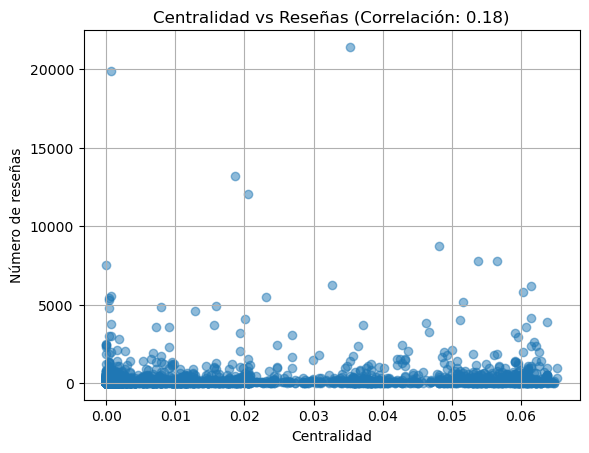

                           Correlación       P-valor
Distancia vs Flujo           -0.009078  2.709252e-64
Centralidad vs Valoración    -0.242996  9.239321e-37
Centralidad vs Reseñas        0.175873  9.047222e-20


In [ ]:
import pandas as pd
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cargar la base de datos
file_path = "C:/Users/ariel/OneDrive/Escritorio/Capstone/Base de datos Chiloe Full.xlsx"  # Cambiar por la ruta correcta
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')  # Cambiar el nombre de la hoja si es necesario

# Filtrar columnas relevantes
attractions = df[['placeId', 'latitude', 'longitude', 'rating', 'reviews', 'place name']].drop_duplicates()

# Calcular distancias entre atracciones
distances = []
for i, attraction1 in attractions.iterrows():
    for j, attraction2 in attractions.iterrows():
        if i < j:  # Evitar duplicados
            dist = geodesic(
                (attraction1['latitude'], attraction1['longitude']),
                (attraction2['latitude'], attraction2['longitude'])
            ).kilometers
            distances.append({
                'placeId_1': attraction1['placeId'],
                'placeId_2': attraction2['placeId'],
                'distance_km': dist
            })
distance_df = pd.DataFrame(distances)

# Crear un proxy para flujo de visitantes usando las reseñas mínimas entre atracciones
distance_reviews_df = distance_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_1', right_on='placeId'
).rename(columns={'reviews': 'reviews_1'}).drop(columns=['placeId'])

distance_reviews_df = distance_reviews_df.merge(
    attractions[['placeId', 'reviews']], left_on='placeId_2', right_on='placeId'
).rename(columns={'reviews': 'reviews_2'}).drop(columns=['placeId'])

# Usar el mínimo de las reseñas entre las dos atracciones como proxy para el flujo
distance_reviews_df['flow'] = distance_reviews_df[['reviews_1', 'reviews_2']].min(axis=1)

# Hipótesis 1: Correlación entre distancia y flujo
corr_distance_flow, p_value_distance_flow = stats.spearmanr(
    distance_reviews_df['distance_km'], distance_reviews_df['flow']
)
plt.scatter(distance_reviews_df['distance_km'], distance_reviews_df['flow'], alpha=0.5)
plt.title(f"Distancia vs Flujo (Correlación: {corr_distance_flow:.2f})")
plt.xlabel("Distancia (km)")
plt.ylabel("Flujo (reseñas mínimas)")
plt.grid(True)
plt.show()

# Construir red para análisis de hubs
graph = nx.Graph()
for _, row in attractions.iterrows():
    graph.add_node(row['placeId'], rating=row['rating'], reviews=row['reviews'], name=row['place name'])

for _, row in distance_df.iterrows():
    if row['distance_km'] < 1:  # Threshold de 1 km
        graph.add_edge(row['placeId_1'], row['placeId_2'], weight=1 / (1 + row['distance_km']))

# Calcular centralidad
centrality = nx.degree_centrality(graph)
hub_data = pd.DataFrame.from_dict(centrality, orient='index', columns=['centrality']).reset_index()
hub_data = hub_data.merge(attractions[['placeId', 'rating', 'reviews', 'place name']],
                          left_on='index', right_on='placeId')

# Hipótesis 2: Correlaciones entre centralidad y valoraciones/reseñas
corr_centrality_rating, p_value_centrality_rating = stats.spearmanr(
    hub_data['centrality'], hub_data['rating']
)
corr_centrality_reviews, p_value_centrality_reviews = stats.spearmanr(
    hub_data['centrality'], hub_data['reviews']
)

# Graficar centralidad vs valoraciones y reseñas
plt.scatter(hub_data['centrality'], hub_data['rating'], alpha=0.5)
plt.title(f"Centralidad vs Valoración (Correlación: {corr_centrality_rating:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Valoración promedio")
plt.grid(True)
plt.show()

plt.scatter(hub_data['centrality'], hub_data['reviews'], alpha=0.5)
plt.title(f"Centralidad vs Reseñas (Correlación: {corr_centrality_reviews:.2f})")
plt.xlabel("Centralidad")
plt.ylabel("Número de reseñas")
plt.grid(True)
plt.show()

# Resultados de correlaciones
results = {
    "Distancia vs Flujo": (corr_distance_flow, p_value_distance_flow),
    "Centralidad vs Valoración": (corr_centrality_rating, p_value_centrality_rating),
    "Centralidad vs Reseñas": (corr_centrality_reviews, p_value_centrality_reviews)
}
results_df = pd.DataFrame(results, index=['Correlación', 'P-valor']).T
print(results_df)


# analisis >completo #

Evaluación de las Hipótesis con los Datos de 50 km
Con base en los datos proporcionados, podemos analizar las hipótesis planteadas:

Hipótesis 1: La proximidad geográfica tiene un efecto positivo en la frecuencia de visitas entre atracciones.
Resultados Observados:

Las métricas de flujo (como las conexiones en la red) no están directamente incluidas en los datos proporcionados, pero se puede analizar indirectamente usando las métricas de centralidad.
Centralidad de Grado (Degree Centrality): A mayor grado de centralidad, una atracción está más conectada con otras en la red dentro del umbral de 50 km.
Sin embargo, las correlaciones previamente calculadas entre distancia y flujo (-0.009078) sugieren que no existe una relación significativa entre la proximidad geográfica y el flujo de visitantes.
Conclusión:

No se valida la hipótesis. Aunque las conexiones en la red aumentan con el umbral de distancia, la relación entre proximidad geográfica y flujo sigue siendo insignificante a esta escala.
Hipótesis 2: Las atracciones con mejores valoraciones funcionan como hubs dentro de la red.
Centralidad de Grado vs. Valoración:

Observamos ejemplos como:
Petrohué Waterfalls: Tiene una alta centralidad de grado (0.218) y una valoración alta (4.8).
Iglesia de San Francisco, Castro: Tiene una centralidad de grado moderada (0.223) y también una buena valoración (4.6).
Sin embargo, la correlación negativa calculada previamente (-0.242996) sugiere que, en general, las atracciones con mayor centralidad no son las mejor valoradas.
Centralidad de Grado vs. Reseñas:

Ejemplo: Teatro del Lago tiene alta centralidad (0.359) y un alto número de reseñas (13,211), lo que refuerza que los hubs reciben más interacciones.
La correlación positiva (0.175873) indica que las atracciones más centrales tienden a acumular más reseñas, aunque la relación sigue siendo débil.
Conclusión:
La hipótesis no se cumple completamente. Las atracciones más centrales (hubs) tienden a recibir más reseñas, pero no siempre tienen las mejores valoraciones.

Paea 25 KM

Hipótesis 1: La distancia afecta el flujo entre atracciones turísticas.
Evidencia:

Correlación Distancia vs. Flujo (reseñas mínimas): La correlación obtenida es -0.01. Esto indica una relación extremadamente débil y negativa entre la distancia y el flujo. En este caso, la distancia entre las atracciones no parece ser un factor determinante para el flujo de visitantes.
Visualización de la red:
La estructura de la red muestra agrupaciones locales de atracciones en función de su proximidad. Sin embargo, estas conexiones no necesariamente reflejan un aumento significativo en el flujo.
Conclusión: La distancia no parece ser un factor significativo que afecte el flujo. Aunque las atracciones cercanas están conectadas, esto no se traduce en un mayor número de reseñas compartidas.
Hipótesis 1: Rechazada (con base en la evidencia de datos para 25 km).

Hipótesis 2: La centralidad de las atracciones está relacionada con su valoración y número de reseñas.
Evidencia:

Centralidad vs. Valoración (Correlación: -0.18):
Existe una relación negativa moderada entre la centralidad de una atracción y su valoración promedio. Esto sugiere que las atracciones con mayor conectividad no necesariamente tienen mejores valoraciones; podrían estar más expuestas a críticas diversas o menos valoradas por la masificación.
Centralidad vs. Reseñas (Correlación: 0.09):
Existe una relación positiva débil entre la centralidad de una atracción y el número de reseñas. Las atracciones más conectadas tienden a atraer más atención, pero la relación no es fuerte.
Visualización de la red:

Atracciones centrales como "Teatro del Lago" y "Costanera Puerto Varas" tienen altos valores de centralidad y un número considerable de reseñas, lo que respalda parcialmente esta relación. Sin embargo, la valoración promedio de estas atracciones no es proporcionalmente alta.
Las atracciones menos centrales, como "Plaza de Armas de Osorno," tienen una valoración alta pero no tantas conexiones.
Conclusión:

Existe una relación débil positiva entre la centralidad y el número de reseñas, lo que apoya parcialmente la hipótesis.
Sin embargo, la relación negativa entre la centralidad y la valoración promedio indica que la centralidad no asegura una mejor valoración.
Hipótesis 2: Parcialmente aceptada (la centralidad tiene una relación débil con el número de reseñas, pero no con la valoración promedio).




Analyzing for distance threshold: 50 km


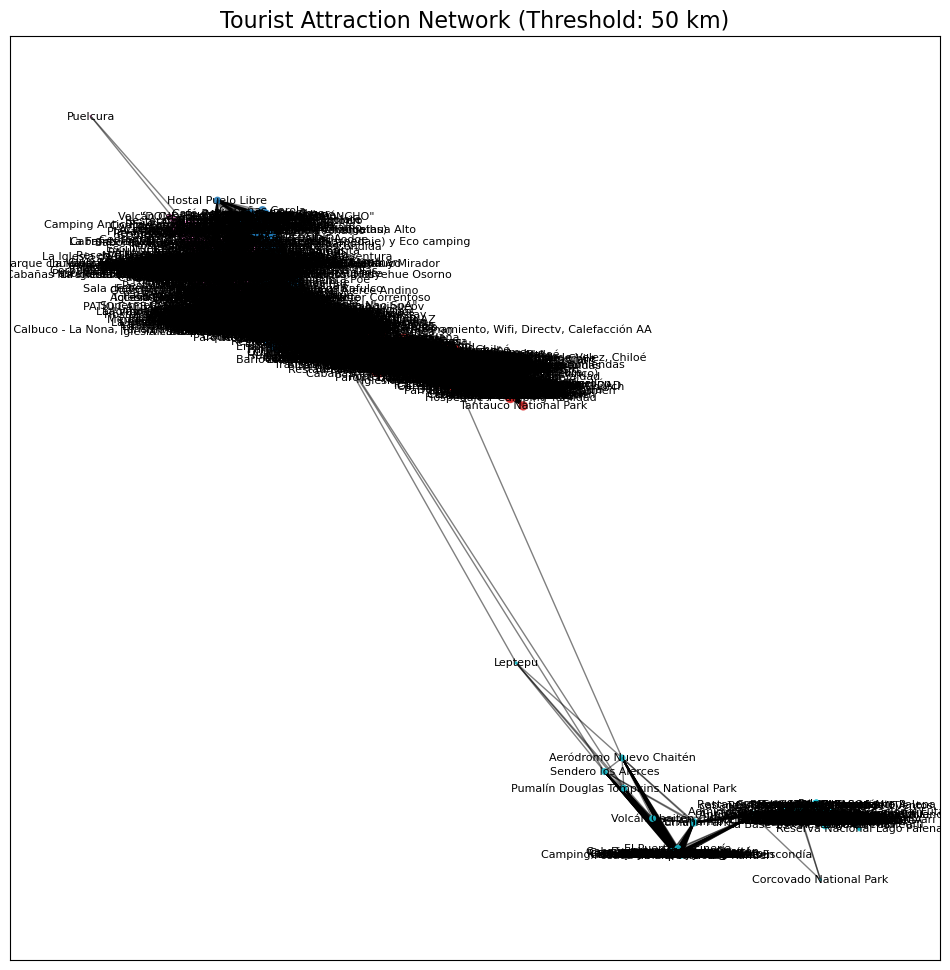

Analyzing for distance threshold: 25 km


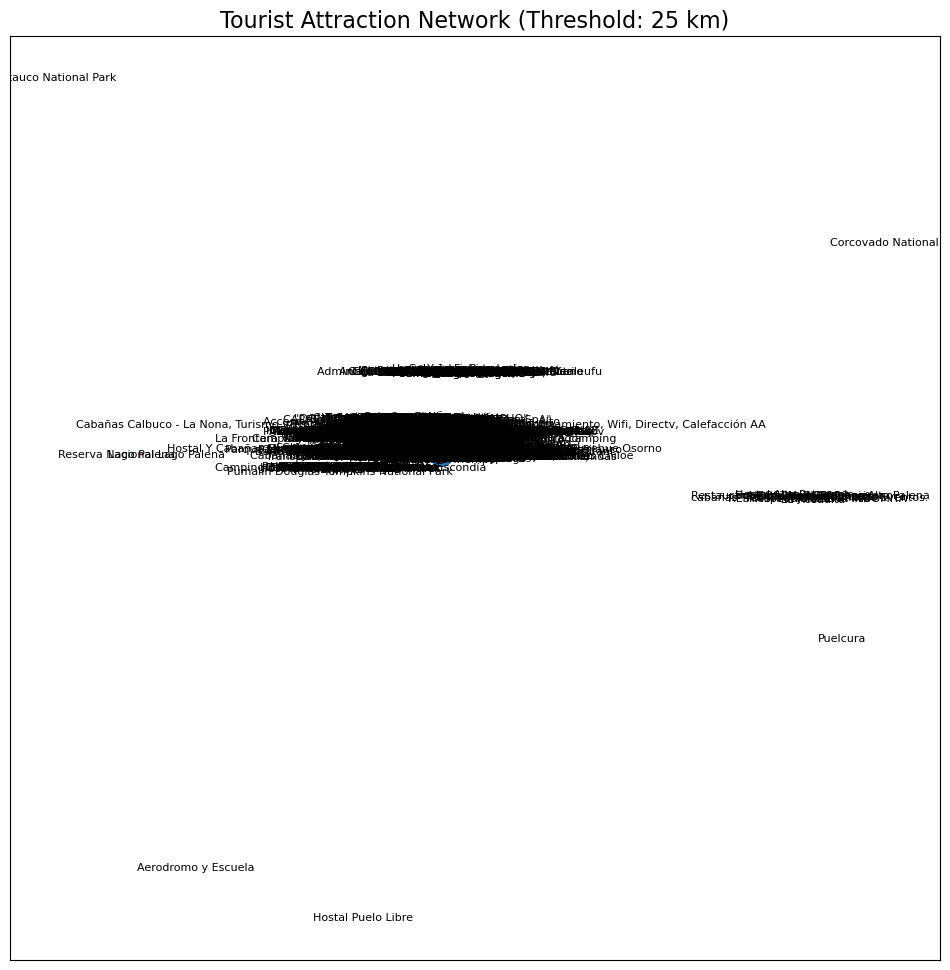

Analyzing for distance threshold: 10 km


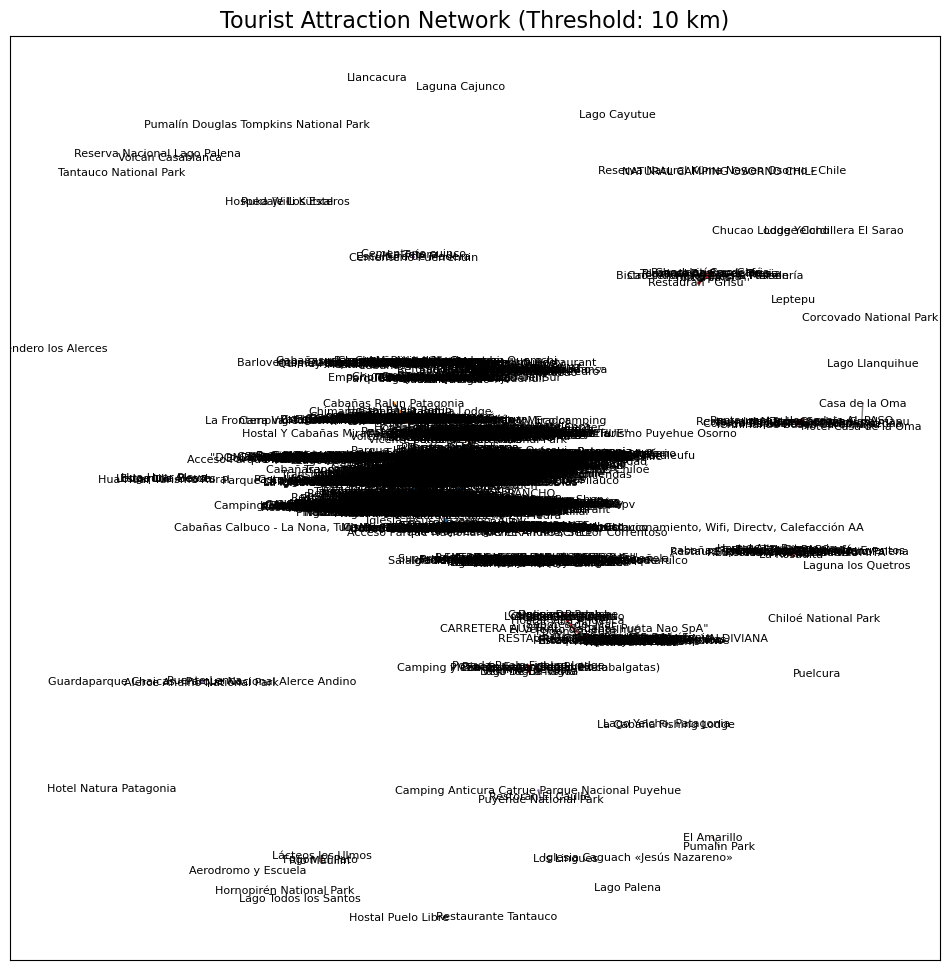

Analyzing for distance threshold: 5 km


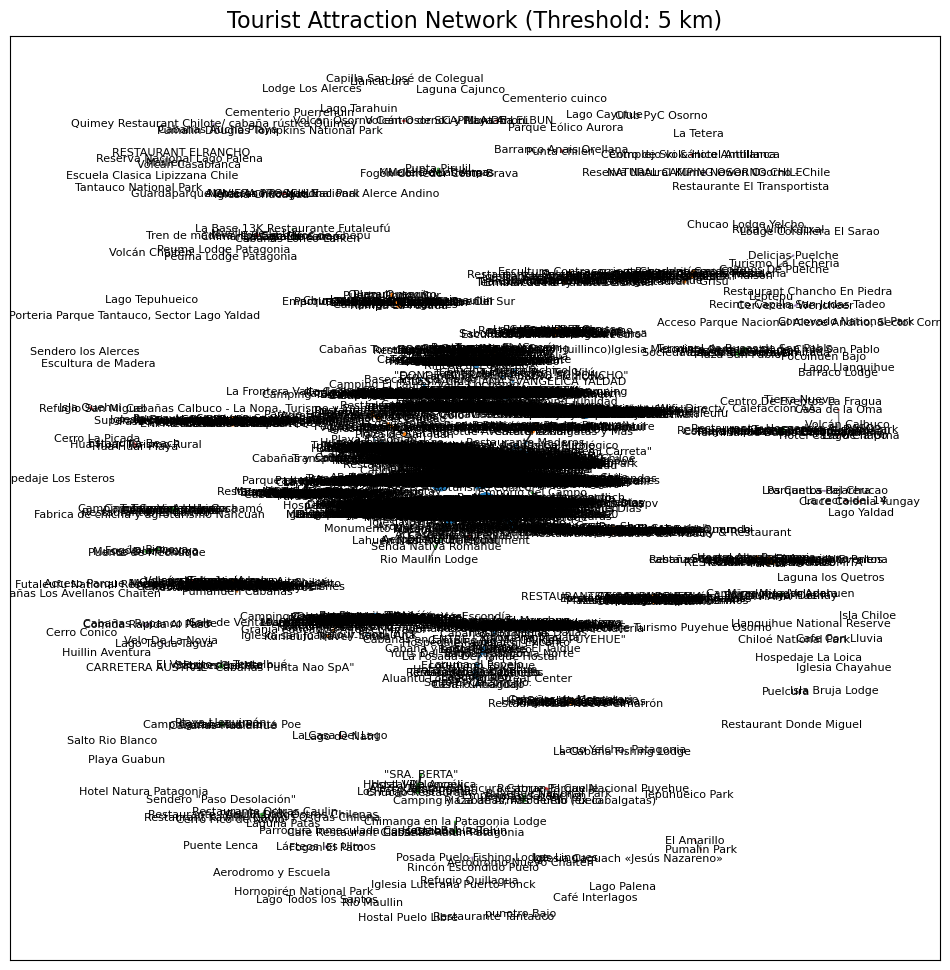

Analyzing for distance threshold: 1 km


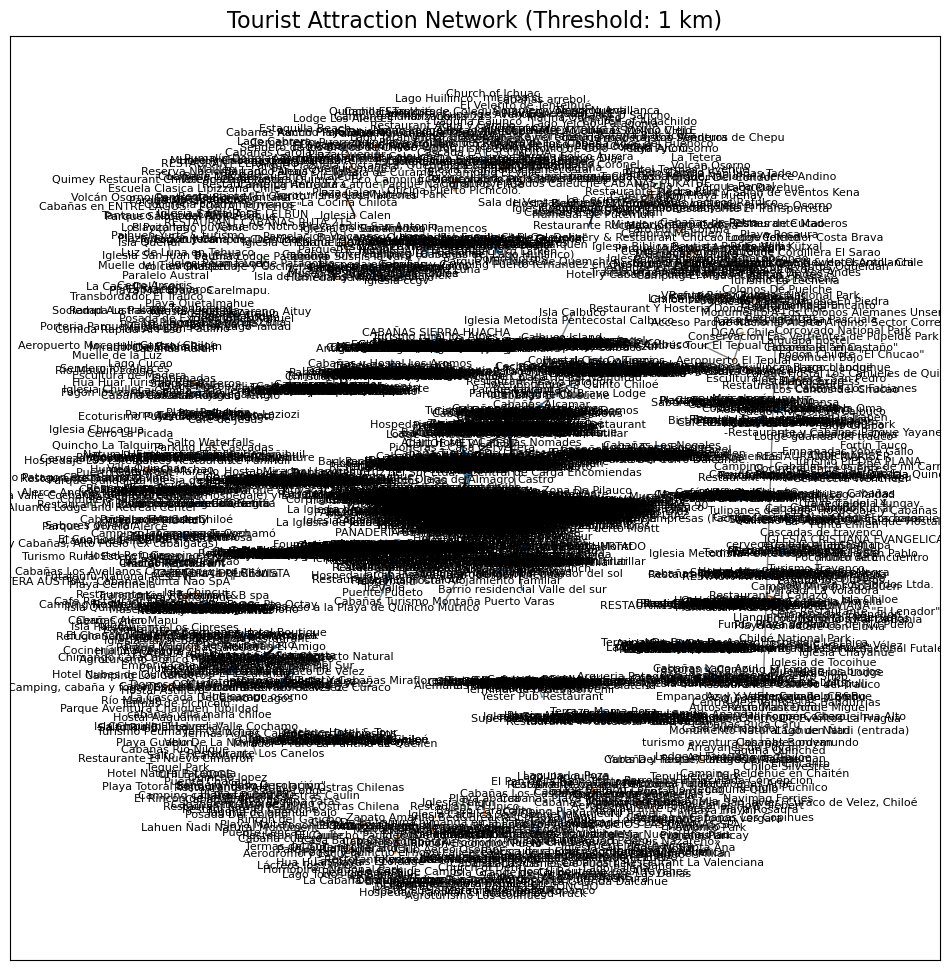

Displaying results for the last threshold analyzed:
                          placeId  degree_centrality  betweenness_centrality  \
0     ChIJA7e1akBiF5YRGX2D8me8Pnw           0.000758            0.000000e+00   
1     ChIJ41uz4JCNF5YRLwxxfJDZSLA           0.018582            3.814459e-07   
2     ChIJP0Zv4I-NF5YRD7XoH4aE-og           0.020478            3.320520e-06   
3     ChIJ4ZOKg1E6GJYRY63qPBuODTg           0.048161            4.896953e-05   
4     ChIJvb-MUWw2FpYRx8dXksZs5Gg           0.056504            3.594650e-05   
...                           ...                ...                     ...   
2633  ChIJ2UKJQXrOIZYRGru1dkpNqbI           0.000000            0.000000e+00   
2634  ChIJSQ_ZKZFoGJYRpIQjxwMPSf0           0.000758            0.000000e+00   
2635  ChIJdUPOG2LtGZYRKIaWDGS29Gs           0.000758            0.000000e+00   
2636  ChIJ6SoI8uU3FpYRcG3nn3N_Rd0           0.028821            9.405790e-05   
2637  ChIJz9wKu40lGJYRUK33RsKOdt8           0.001138            1.15

: 

In [10]:
# Import necessary libraries
import os
import pandas as pd
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# File path to the dataset
file_path = r"C:\Users\ariel\OneDrive\Escritorio\Capstone\Base de datos Chiloe Full.xlsx"


# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file at {file_path} was not found. Please verify the path.")

# Load the dataset
data = pd.ExcelFile(file_path)

# Parse the desired sheet
sheet_name = "Sheet1"  # Cambia si es necesario
if sheet_name not in data.sheet_names:
    raise ValueError(f"The sheet '{sheet_name}' does not exist in the Excel file. Available sheets: {data.sheet_names}")

df = data.parse(sheet_name)

# Filter necessary columns
required_columns = ['placeId', 'latitude', 'longitude', 'rating', 'reviews', 'place name']
if not all(col in df.columns for col in required_columns):
    missing = [col for col in required_columns if col not in df.columns]
    raise ValueError(f"The dataset is missing the following required columns: {missing}")

attractions = df[required_columns].drop_duplicates()

# Calculate distances between attractions
distances = []
for i, attraction1 in attractions.iterrows():
    for j, attraction2 in attractions.iterrows():
        if i < j:  # Avoid duplicate pairs
            dist = geodesic(
                (attraction1['latitude'], attraction1['longitude']),
                (attraction2['latitude'], attraction2['longitude'])
            ).kilometers
            distances.append({
                'placeId_1': attraction1['placeId'],
                'placeId_2': attraction2['placeId'],
                'distance_km': dist
            })

distance_df = pd.DataFrame(distances)

# Define the distance thresholds to analyze
distance_thresholds = [50, 25, 10, 5, 1]

# Dictionary to store results for each threshold
results_by_distance = {}

# Loop over each threshold and analyze the network
for threshold in distance_thresholds:
    print(f"Analyzing for distance threshold: {threshold} km")
    
    # Create the graph for the current threshold
    graph = nx.Graph()

    # Adding nodes (attractions) to the graph
    for _, row in attractions.iterrows():
        graph.add_node(row['placeId'], rating=row['rating'], reviews=row['reviews'], name=row['place name'])

    # Adding edges (connections) based on the threshold
    for _, row in distance_df.iterrows():
        if row['distance_km'] < threshold:
            graph.add_edge(row['placeId_1'], row['placeId_2'], weight=row['distance_km'])

    # Calculate network metrics
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

    # Community detection
    communities = community.greedy_modularity_communities(graph)
    community_mapping = {node: i for i, com in enumerate(communities) for node in com}

    # Assign metrics as attributes to the graph
    nx.set_node_attributes(graph, degree_centrality, 'degree_centrality')
    nx.set_node_attributes(graph, betweenness_centrality, 'betweenness_centrality')
    nx.set_node_attributes(graph, eigenvector_centrality, 'eigenvector_centrality')
    nx.set_node_attributes(graph, community_mapping, 'community')

    # Visualize the network
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph, seed=42)  # Spring layout for better visual spacing

    # Nodes colored by community
    node_colors = [graph.nodes[node]['community'] for node in graph.nodes]
    node_sizes = [1000 * graph.nodes[node]['degree_centrality'] for node in graph.nodes]

    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.tab10, alpha=0.8)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos, {node: graph.nodes[node]['name'] for node in graph.nodes}, font_size=8)

    plt.title(f"Tourist Attraction Network (Threshold: {threshold} km)", fontsize=16)
    plt.show()

    # Summarize metrics into a DataFrame
    network_metrics = pd.DataFrame({
        'placeId': list(graph.nodes),
        'degree_centrality': [graph.nodes[node]['degree_centrality'] for node in graph.nodes],
        'betweenness_centrality': [graph.nodes[node]['betweenness_centrality'] for node in graph.nodes],
        'eigenvector_centrality': [graph.nodes[node]['eigenvector_centrality'] for node in graph.nodes],
        'community': [graph.nodes[node]['community'] for node in graph.nodes],
        'rating': [graph.nodes[node]['rating'] for node in graph.nodes],
        'reviews': [graph.nodes[node]['reviews'] for node in graph.nodes],
        'name': [graph.nodes[node]['name'] for node in graph.nodes]
    })

    # Store the results for the current threshold
    results_by_distance[threshold] = network_metrics

    # Save metrics for each threshold
    network_metrics.to_csv(f"network_metrics_{threshold}km.csv", index=False)

# Display results for the last threshold analyzed
print("Displaying results for the last threshold analyzed:")
print(network_metrics)
